In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1. Load the dataset
data = pd.read_json("ultimate_data_challenge.json")

# Inspect the first few rows and columns to understand the structure
print("Columns:", data.columns)
print(data.head())

Columns: Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')
             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0  

In [ ]:
# 2. Data Cleaning & Preprocessing

In [13]:
# Convert 'signup_date' and 'last_trip_date' from 'YYYYMMDD' string to datetime format
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

# Verify conversion by printing the first few rows again
print(data[['signup_date', 'last_trip_date']].head())

# Check for missing values across key columns
key_cols = ['city', 'phone', 'signup_date', 'last_trip_date', 'avg_dist',
            'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct',
            'avg_surge', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']
print("Missing values:\n", data[key_cols].isnull().sum())


  signup_date last_trip_date
0  2014-01-25     2014-06-17
1  2014-01-29     2014-05-05
2  2014-01-06     2014-01-07
3  2014-01-10     2014-06-29
4  2014-01-27     2014-03-15
Missing values:
 city                         0
phone                      396
signup_date                  0
last_trip_date               0
avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
surge_pct                    0
avg_surge                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


In [15]:
# Verify conversion by printing the first few rows again
print(data[['signup_date', 'last_trip_date']].head())

  signup_date last_trip_date
0  2014-01-25     2014-06-17
1  2014-01-29     2014-05-05
2  2014-01-06     2014-01-07
3  2014-01-10     2014-06-29
4  2014-01-27     2014-03-15


In [23]:
# drop rows with missing values in these key columns
data_clean = data.dropna(subset=key_cols)

In [25]:
# Print shape of data before and after cleaning
print("Original data shape:", data.shape)
print("Cleaned data shape:", data_clean.shape)

Original data shape: (50000, 12)
Cleaned data shape: (41445, 12)


In [ ]:
# 3. Create Retention Label

In [29]:
# Define the 6-month anniversary for each user
data_clean.loc[:, 'six_month_anniv'] = data_clean['signup_date'] + pd.DateOffset(months=6)

In [33]:
# Define 'retained' as 1 if the user's last_trip_date is within the 30 days preceding their 6-month anniversary,
# otherwise 0.
data_clean.loc[:, 'retained'] = (data_clean['last_trip_date'] >= (data_clean['six_month_anniv'] - pd.DateOffset(days=30))).astype(int)

In [35]:
# Inspect the computed columns
print(data_clean[['signup_date', 'last_trip_date', 'six_month_anniv', 'retained']].head())

  signup_date last_trip_date six_month_anniv  retained
0  2014-01-25     2014-06-17      2014-07-25         0
1  2014-01-29     2014-05-05      2014-07-29         0
2  2014-01-06     2014-01-07      2014-07-06         0
3  2014-01-10     2014-06-29      2014-07-10         1
4  2014-01-27     2014-03-15      2014-07-27         0


In [37]:
# Calculate and print the retention fraction
retention_fraction = data_clean['retained'].mean()
print("Retention Fraction (proportion of users retained):", retention_fraction)

Retention Fraction (proportion of users retained): 0.271106285438533


In [ ]:
# 4. Exploratory Data Analysis

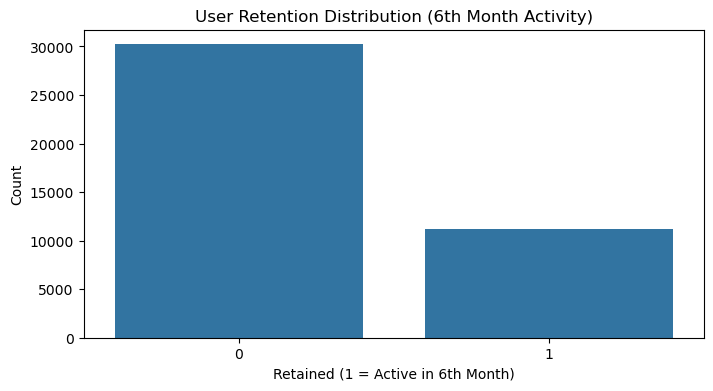

In [39]:
plt.figure(figsize=(8, 4))
sns.countplot(x='retained', data=data_clean)
plt.title("User Retention Distribution (6th Month Activity)")
plt.xlabel("Retained (1 = Active in 6th Month)")
plt.ylabel("Count")
plt.show()

### Discussion Questions

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).